# Image Neighbourhood Operations

Image neighborhood operations, also known as local operations, involve applying a specific operation or filter to a neighborhood of pixels in an image. These operations are performed on a pixel-by-pixel basis, considering the surrounding pixels in a defined neighborhood.

Neighborhood operations are commonly used in image processing for tasks such as image enhancement, noise reduction, edge detection, and feature extraction. They allow us to analyze and manipulate local image characteristics, taking into account the spatial relationship between pixels.

### 1. Read Image

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the image
image_array = cv2.imread('real_image.png', 0)

### 2. Create Neighbourhood kernal by specifying the size of the region

In [29]:
# Define the kernel/filter
kernel = 1/25 * np.array([[1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1]])

# kernel = np.array([[0, -1, 0],
#                    [-1, 4, -1],
#                    [0, -1, 0]])


### 3. Apply averaging on the image using the averaging kernel

In [30]:
# Perform averaging
avg_img = np.zeros_like(image_array)

# Get the dimensions of the image and kernel
image_height, image_width = image_array.shape
kernel_height, kernel_width = kernel.shape
padding_height = kernel_height // 2
padding_width = kernel_width // 2

# Apply Averaging to each pixel
for i in range(padding_height, image_height - padding_height):
    for j in range(padding_width, image_width - padding_width):
        # Get the neighborhood of the pixel
        # x1 = i - padding_height
        # y1 = i + padding_height

        # x2 = j + padding_height
        # y2 = j - padding_height

        neighborhood = image_array[i - padding_height : i + padding_height + 1, j - padding_width : j + padding_width + 1]
        # Perform element-wise multiplication and sum
        avg_pixel = (np.clip(np.sum(neighborhood.astype("float32") * kernel), 0, 255))
        # Assign the result to the corresponding pixel in the convolved image
        avg_img[i, j] = avg_pixel

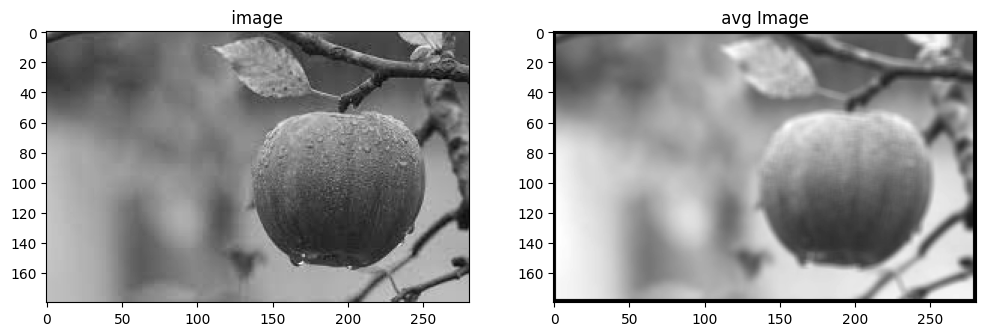

In [31]:
# Create a figure placeholder
fig = plt.figure(figsize=(12, 5))

# show original image on a subplot
fig.add_subplot(121)
plt.title(' image ')
plt.set_cmap('gray')
plt.imshow(image_array)

fig.add_subplot(122)
plt.title(' avg Image ')
plt.set_cmap('gray')
plt.imshow(avg_img)